## K-Nearest Neighbors with Cross-Validation (tie-breaking rule)

Ties occur when multiple classes have the same number of votes among the k nearest neighbors. Different software libraries and implementations use various strategies:

- Random Selection: Simply select one random class
- Sort the values and pick the first occurrence (in Scikit-Learn)
- Increase or Reduce K until there are no ties


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('knn_dataset.csv')
# New predicted sample
A = [2, 8]
# Euclidean distance between A and all points
# We are not using square root for this lab
df['Distance'] = (df['x'] - A[0]) ** 2 + (df['y'] - A[1]) ** 2
df

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2
2,9,9,Blue,50
3,4,8,Green,4
4,7,8,Blue,25
5,1,7,Blue,2
6,3,7,Blue,2
7,4,7,Red,5
8,8,7,Green,37
9,2,5,Purple,9


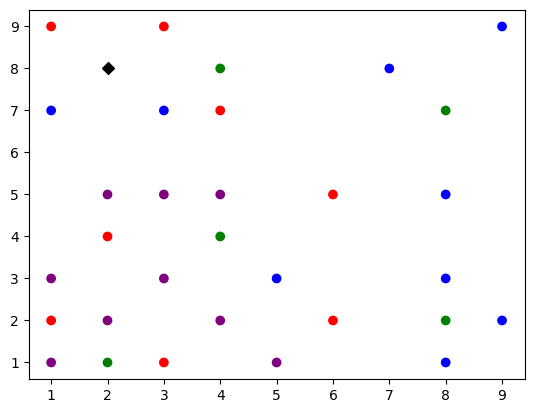

In [21]:
# Draw scatter plot (for reference)
plt.scatter(df['x'], df['y'], c=df['label'])
# Put A to the [2, 8] coordinate (show its name)
plt.scatter(A[0], A[1], c='black', marker='D')

In [22]:
# Select K and select the nearest K neighbors by sorting
K = 2
df_sorted = df.sort_values(by='Distance')
df_nearest = df_sorted.head(K)
df_nearest

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2


In [23]:
K = 4
df_sorted = df.sort_values(by='Distance')
df_nearest = df_sorted.head(K)
df_nearest

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2
6,3,7,Blue,2
5,1,7,Blue,2


We encounter class ties (2 Red and 2 Blue) alongside distance ties → In this case, the model select A = (2, 8) as Red since it occurs first.

In [24]:
K = 6
df_sorted = df.sort_values(by='Distance')
df_nearest = df_sorted.head(K)
df_nearest

,x,y,label,Distance
0,1,9,Red,2
1,3,9,Red,2
6,3,7,Blue,2
5,1,7,Blue,2
3,4,8,Green,4
7,4,7,Red,5


Tie breaks!! The prediction for A = (2, 8) is Red because of major votes

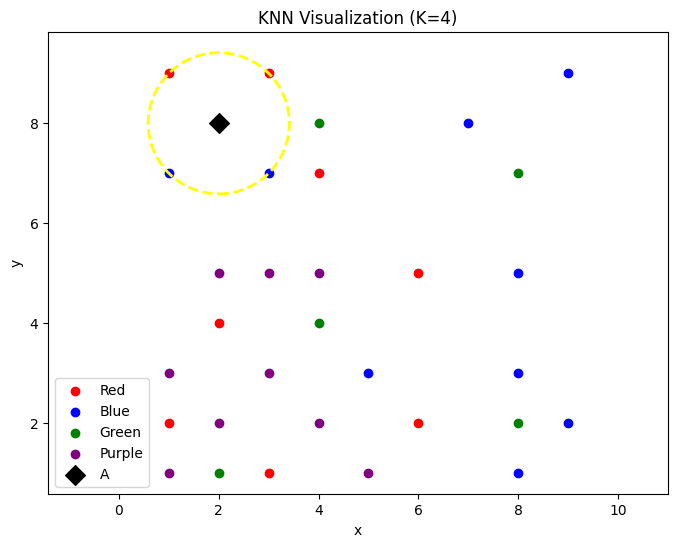

In [25]:
K = 4
df_nearest = df_sorted.head(K)
# Draw nearest neighbor circle for A
# Scatter plot of all points (color-coded by label)
plt.figure(figsize=(8,6))
for label, color in zip(['Red', 'Blue', 'Green', 'Purple'], ['red', 'blue', 'green', 'purple']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=label)

# Plot point A
plt.scatter(A[0], A[1], c='black', marker='D', s=100, label='A')

# Draw circle around A that covers its K nearest neighbor(s)
# Circle radius = Euclidean distance to the farthest neighbor among K nearest
radius = np.sqrt(df_nearest['Distance'].max())
circle = plt.Circle((A[0], A[1]), radius, color='yellow', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Visualization (K={K})')
plt.legend()
plt.axis('equal')
plt.show()

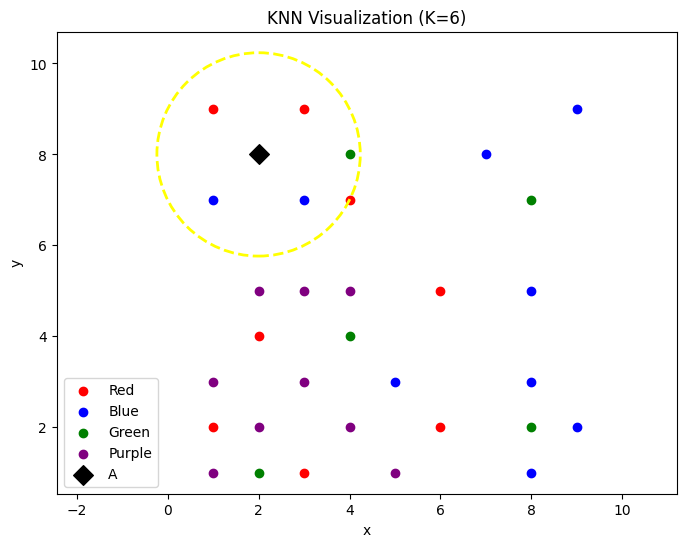

In [26]:
K = 6
df_nearest = df_sorted.head(K)
# Draw nearest neighbor circle for A
# Scatter plot of all points (color-coded by label)
plt.figure(figsize=(8,6))
for label, color in zip(['Red', 'Blue', 'Green', 'Purple'], ['red', 'blue', 'green', 'purple']):
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=color, label=label)

# Plot point A
plt.scatter(A[0], A[1], c='black', marker='D', s=100, label='A')

# Draw circle around A that covers its K nearest neighbor(s)
# Circle radius = Euclidean distance to the farthest neighbor among K nearest
radius = np.sqrt(df_nearest['Distance'].max())
circle = plt.Circle((A[0], A[1]), radius, color='yellow', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Visualization (K={K})')
plt.legend()
plt.axis('equal')
plt.show()

Cross Validation in K-Nearest Neighbors

In [28]:
# Cross Validation with pandas and loops
def cross_validation(df):
  K_max = int(np.sqrt(len(df)))  # common heuristic
  accuracies = []

  # This loop tests all K from 1 to sqrt(N).
  for K in range(1, K_max+1):
      correct = 0
      for i in range(len(df)):
          # leave-one-out
          validation = df.iloc[i]
          train = df.drop(i)
          # compute distances to A
          train['Distance'] = (train['x'] - validation['x'])**2 + (train['y'] - validation['y'])**2
          nearest = train.sort_values('Distance').head(K)
          # majority vote
          votes = nearest['label'].value_counts()
          prediction = votes.idxmax()

          if prediction == validation['label']:
              correct += 1
      accuracies.append((K, correct/len(df)))
  # Accuracy for each K → pick the best K.
  return accuracies, max(accuracies)[0]


accuracies, best_K = cross_validation(df)
print("Accuracies:", accuracies)
print("Best K:", best_K)

Accuracies: [(1, 0.0967741935483871), (2, 0.0967741935483871), (3, 0.1935483870967742), (4, 0.3548387096774194), (5, 0.3870967741935484)]
Best K: 5


Now, we will classify these points to one of the labels.
- A = (2, 8)
- B = (6, 7)
- C = (7, 5)
- D = (2, 3)
- E = (7, 2)
- F = (4, 1)

With Cross-Validation

In [29]:
# A = (2, 8) is already predicted as Red, so we skip it
# B = (6, 7), C = (7, 5), D = (2, 3), E = (7, 2), F = (4, 1)
# New predicted sample
points = [[6, 7], [7, 5], [2, 3], [7, 2], [4, 1]]
for p in range(len(points)):
  # Euclidean distance between the given point and all points
  df[f'Distance_{p}'] = (df['x'] - points[p][0]) ** 2 + (df['y'] - points[p][1]) ** 2
df


,x,y,label,Distance,Distance_0,Distance_1,Distance_2,Distance_3,Distance_4
0,1,9,Red,2,29,52,37,85,73
1,3,9,Red,2,13,32,37,65,65
2,9,9,Blue,50,13,20,85,53,89
3,4,8,Green,4,5,18,29,45,49
4,7,8,Blue,25,2,9,50,36,58
5,1,7,Blue,2,25,40,17,61,45
6,3,7,Blue,2,9,20,17,41,37
7,4,7,Red,5,4,13,20,34,36
8,8,7,Green,37,4,5,52,26,52
9,2,5,Purple,9,20,25,4,34,20


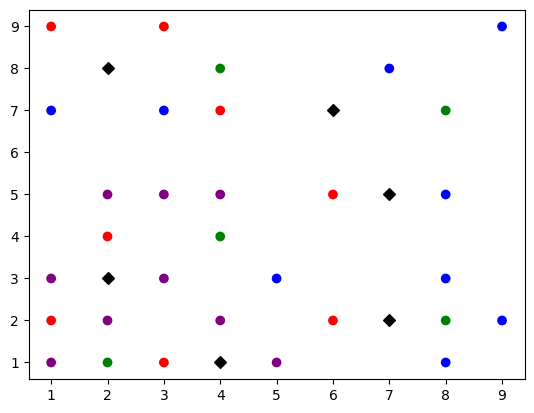

In [30]:
# Draw scatter plot (for reference)
plt.scatter(df['x'], df['y'], c=df['label'])
# Put A to the [2, 8] coordinate (show its name)
plt.scatter(A[0], A[1], c='black', marker='D')
for p in range(len(points)):
  plt.scatter(points[p][0], points[p][1], c='black', marker='D')

In [51]:
K = best_K
predicted_class = []
for i in df.drop(columns=['x', 'y', 'label']).columns:
  df_sorted = df.sort_values(by=i)
  df_nearest = df_sorted[['x', 'y', 'label']].head(K)
  print(f"Nearest Neighbors (k = {K})")
  print(df_nearest)
  predicted_class.append(df_nearest['label'].mode()[0])
  print(f"Predicted Class: {df_nearest['label'].mode()[0]} \n")

Nearest Neighbors (k = 5)
   x  y  label
0  1  9    Red
1  3  9    Red
6  3  7   Blue
5  1  7   Blue
3  4  8  Green
Predicted Class: Blue 

Nearest Neighbors (k = 5)
    x  y  label
4   7  8   Blue
7   4  7    Red
12  6  5    Red
8   8  7  Green
3   4  8  Green
Predicted Class: Green 

Nearest Neighbors (k = 5)
    x  y  label
12  6  5    Red
13  8  5   Blue
8   8  7  Green
19  8  3   Blue
18  5  3   Blue
Predicted Class: Blue 

Nearest Neighbors (k = 5)
    x  y   label
14  2  4     Red
21  2  2  Purple
17  3  3  Purple
16  1  3  Purple
20  1  2     Red
Predicted Class: Purple 

Nearest Neighbors (k = 5)
    x  y  label
24  8  2  Green
23  6  2    Red
19  8  3   Blue
30  8  1   Blue
25  9  2   Blue
Predicted Class: Blue 

Nearest Neighbors (k = 5)
    x  y   label
29  5  1  Purple
28  3  1     Red
22  4  2  Purple
27  2  1   Green
18  5  3    Blue
Predicted Class: Purple 



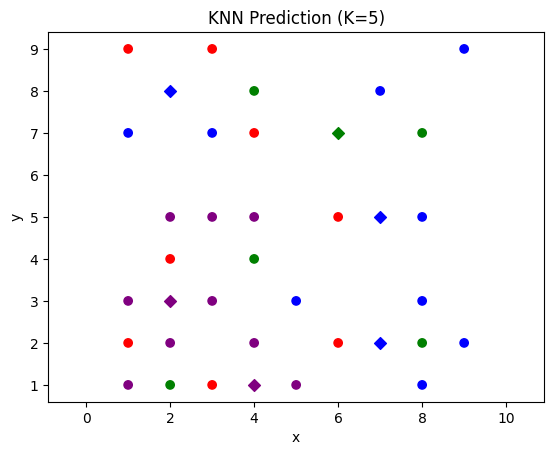

In [58]:
# Redraw the KNN plot
points = [[2, 8], [6, 7], [7, 5], [2, 3], [7, 2], [4, 1]]
plt.scatter(df['x'], df['y'], c=df['label'])
for p in range(len(points)):
  plt.scatter(points[p][0], points[p][1], c=predicted_class[p].lower(), marker='D')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Prediction (K={K})')
plt.axis('equal')
plt.show()

Optional: Choose K = 6

Nearest Neighbors (k = 6)
   x  y  label
0  1  9    Red
1  3  9    Red
6  3  7   Blue
5  1  7   Blue
3  4  8  Green
7  4  7    Red
Predicted Class: Red 

Nearest Neighbors (k = 6)
    x  y  label
4   7  8   Blue
7   4  7    Red
12  6  5    Red
8   8  7  Green
3   4  8  Green
13  8  5   Blue
Predicted Class: Blue 

Nearest Neighbors (k = 6)
    x  y  label
12  6  5    Red
13  8  5   Blue
8   8  7  Green
19  8  3   Blue
18  5  3   Blue
4   7  8   Blue
Predicted Class: Blue 

Nearest Neighbors (k = 6)
    x  y   label
14  2  4     Red
21  2  2  Purple
17  3  3  Purple
16  1  3  Purple
20  1  2     Red
9   2  5  Purple
Predicted Class: Purple 

Nearest Neighbors (k = 6)
    x  y   label
24  8  2   Green
23  6  2     Red
19  8  3    Blue
30  8  1    Blue
25  9  2    Blue
29  5  1  Purple
Predicted Class: Blue 

Nearest Neighbors (k = 6)
    x  y   label
29  5  1  Purple
28  3  1     Red
22  4  2  Purple
27  2  1   Green
18  5  3    Blue
21  2  2  Purple
Predicted Class: Purple 



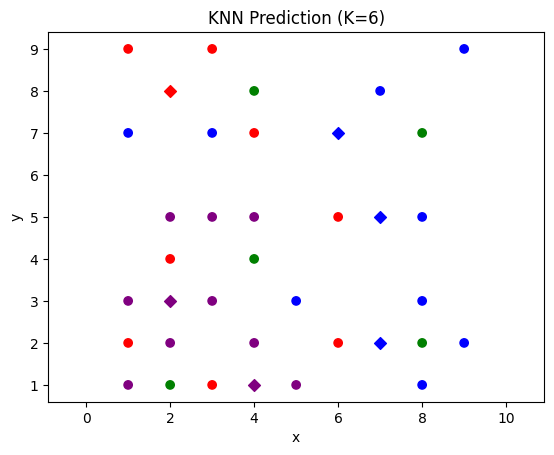

In [59]:
K = 6
predicted_class = []
for i in df.drop(columns=['x', 'y', 'label']).columns:
  df_sorted = df.sort_values(by=i)
  df_nearest = df_sorted[['x', 'y', 'label']].head(K)
  print(f"Nearest Neighbors (k = {K})")
  print(df_nearest)
  predicted_class.append(df_nearest['label'].mode()[0])
  print(f"Predicted Class: {df_nearest['label'].mode()[0]} \n")

# Redraw the KNN plot
points = [[2, 8], [6, 7], [7, 5], [2, 3], [7, 2], [4, 1]]
plt.scatter(df['x'], df['y'], c=df['label'])
for p in range(len(points)):
  plt.scatter(points[p][0], points[p][1], c=predicted_class[p].lower(), marker='D')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'KNN Prediction (K={K})')
plt.axis('equal')
plt.show()